<img src="https://github.com/AlejandroCalderon27/techlabsExamAlejandroCalderon/blob/main/TechLabs.png?raw=1">

<h2>Please enter your full name here:</h2> Luis Alejandro Calderón



<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# Print the logit accuracy below:

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.30)
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
logitacc = clf.score(X_test, y_test)
print(f"\ntesting set accuracy with logit is: {logitacc}")


testing set accuracy with logit is: 0.9707602339181286


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [8]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [9]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [16]:
#defining the model
model = Sequential()
model.add(Dense(30, activation="relu", input_shape=(len(data.feature_names),)))
model.add(Dense(50, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_13 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
#fitting the model
model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000

In [56]:
ANNacc = model.evaluate(X_test, y_test)
print(f"\ntesting set accuracy with logit is: {ANNacc}")

6/6 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.9415

testing set accuracy with logit is: [0.42357319593429565, 0.9415204524993896]


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

In [ ]:
'''
The Logistic Regression model has a slightly better performance than the Neural Network, being 97.07% vs 94.15% respectively.
However, they are both very close, and with a little bit of model fine tunning one of the model might become significantly
better than the other.
A possible explanation for this result is that Neural Networks are more flexible than Logistic Regressions and therefore, more
suceptible to overfitting. As it can be seen, the Neural Network has an accuracy of 100% when tested against the training
set, but it decreases when compared to the test set. There may be a little bit of overfitting, which makes the Logistic
Regression better for this problem.
'''

'\nTell us here how you would explain the differences in performance among the models\n'

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

In [22]:
from scipy.stats import t
import matplotlib.pyplot as plt

In [48]:
def callpayoff():
  payoffs = []
  for i in range(1000000):
    simulated_price = 69*1.1 + sum(t.rvs(3, scale = 69*0.2, size = 252))
    payoffs.append(max(simulated_price - 96, 0))
  plt.figure(figsize = (15,10))
  plt.hist(payoffs, bins=30)
  plt.show()
  print(f'The call option price is {sum(payoffs)/len(payoffs)}')
  return sum(payoffs)/len(payoffs)


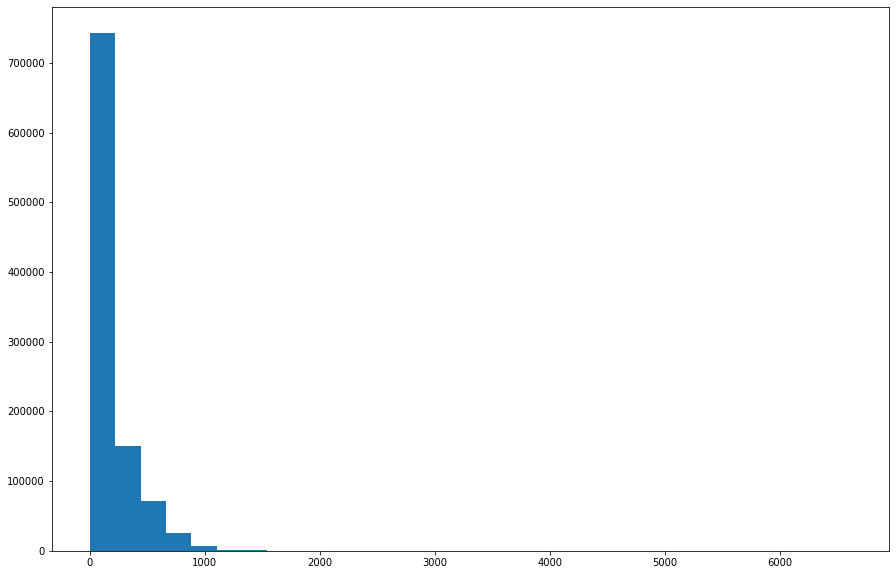

The call option price is 139.22873080668046


139.22873080668046

In [49]:
callpayoff()

<b>Recommendation to my boss: </b>Since the fair price (the expected payoff) of the option is 139.3 €, which is superior to the option/s price of 1 €, the boss should buy this option since on average it represents a profit.

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
